In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from text2topics import reports
from text2topics import utilities
from text2topics import clean
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = utilities.create_spelling_dictionary(wordlist_dir, wordlists)

In [7]:
title = "PTAR"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PTAR/baseline

Average verified rate: 0.9258265879793642

Average of error rates: 0.0755695652173913

Total token count: 228923



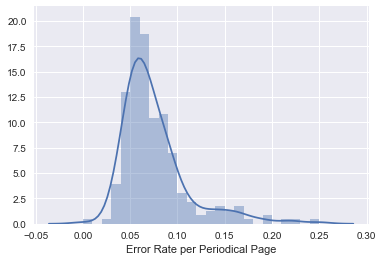

In [10]:
stats = reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = reports.get_errors_summary( stats )
reports.top_errors( errors_summary, 30 )

[('-', 612),
 ("'", 515),
 ('ñ', 232),
 (')', 230),
 ('th', 161),
 ('ch', 128),
 ('re-', 124),
 ('be-', 121),
 (']', 114),
 ('d', 113),
 ('¥', 110),
 ('com-', 97),
 ('con-', 97),
 ('ment', 92),
 ('tion', 84),
 ('n', 72),
 ('ver', 71),
 ('ly', 65),
 ('in-', 65),
 ('ex', 64),
 ('e', 62),
 ('x', 60),
 ('un-', 58),
 ('t', 57),
 ('*', 57),
 ('sab-', 56),
 ('de-', 56),
 ('ex-', 55),
 ('m', 54),
 ("'the", 54),
 ('w', 51),
 ('an-', 45),
 ("the'", 44),
 ('pro-', 44),
 ('ments', 43),
 ('ad-', 40),
 ('_', 39),
 ('the-', 39),
 ('r', 35),
 ('ñthe', 35),
 ('command-', 35),
 ('dis-', 35),
 ('pre-', 34),
 ('mandments', 34),
 ('-the', 32)]

## Check Special Character Use

In [12]:
reports.tokens_with_special_characters(errors_summary)[:50]

[('ñ', 232),
 (')', 230),
 (']', 114),
 ('¥', 110),
 ('*', 57),
 ('_', 39),
 ('ñthe', 35),
 ('(the', 26),
 ('(see', 24),
 ('[the', 21),
 ('(', 19),
 ('saysñ', 18),
 ('(or', 17),
 ('[', 14),
 ('(ps', 11),
 ('ñsee', 11),
 ('(margin', 10),
 ('ô', 10),
 ('ñthat', 10),
 ('(which', 10),
 ('[margin', 10),
 ('ñps', 8),
 ('/', 8),
 ('[rev', 8),
 ('[or', 8),
 ('(i', 8),
 ('(for', 7),
 ('[letter', 7),
 ('=', 7),
 ('(though', 7),
 ('[no', 7),
 ('(rev', 6),
 ('[see', 6),
 ('ñand', 6),
 ("ñ'", 6),
 ('ñto', 6),
 ('holies]', 6),
 ('cryñ', 5),
 ('(and', 5),
 ('saidñ', 5),
 ('(as', 5),
 ('ñwe', 5),
 ('[in', 5),
 ('(in', 5),
 ('(heb', 5),
 ('truthñthe', 4),
 ('worldña', 4),
 ('(to', 4),
 ('willñthat', 4),
 ('it)', 4)]

## Correction 1 -- Normalize Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 1

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PTAR/correction1

Average verified rate: 0.9364051306513091

Average of error rates: 0.06533913043478261

Total token count: 228509



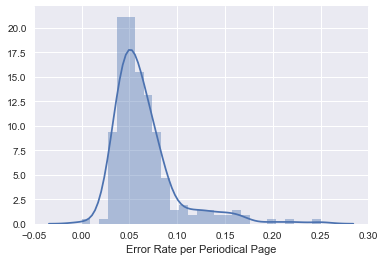

In [14]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('-', 621),
 ("'", 550),
 ('th', 162),
 ('ch', 131),
 ('re-', 124),
 ('be-', 121),
 ('d', 116),
 ('com-', 97),
 ('con-', 97),
 ('ment', 92),
 ('tion', 87),
 ('n', 77),
 ('ver', 74),
 ('ex', 70),
 ('e', 70),
 ('ly', 67),
 ('in-', 65),
 ('t', 64),
 ('x', 60),
 ('un-', 58),
 ('sab-', 56),
 ('de-', 56),
 ('ex-', 55),
 ("'the", 55),
 ('m', 54),
 ('w', 52),
 ('an-', 45),
 ("the'", 44),
 ('pro-', 44),
 ('ments', 43),
 ('ad-', 42),
 ('the-', 39),
 ('r', 35),
 ('mandments', 35),
 ('command-', 35),
 ('dis-', 35),
 ('pre-', 34),
 ('-the', 32),
 ('per-', 31),
 ('atone-', 30),
 ('ry', 29),
 ('--', 27),
 ('f', 27),
 ('tuary', 27),
 ('je-', 26),
 ('ble', 25),
 ('g', 25),
 ('ple', 25),
 ('tions', 24),
 ('mercy-seat', 23)]

## Correction 2 -- Correct Line Endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

## Check Correction 2

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PTAR/correction2

Average verified rate: 0.9506618639049302

Average of error rates: 0.0509304347826087

Total token count: 224593



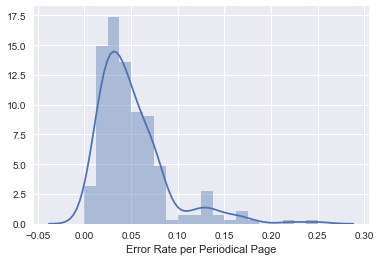

In [17]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('-', 617),
 ("'", 550),
 ('th', 161),
 ('ch', 131),
 ('d', 116),
 ('n', 76),
 ('ver', 73),
 ('ex', 70),
 ('e', 70),
 ('t', 64),
 ('x', 58),
 ("'the", 55),
 ('m', 54),
 ('w', 52),
 ("the'", 44),
 ('ment', 43),
 ('r', 35),
 ('tion', 34),
 ('ly', 33),
 ('-the', 32),
 ('--', 27),
 ('f', 27),
 ('g', 25),
 ('mercy-seat', 24),
 ("'of", 23),
 ("and'", 20),
 ('ments', 20),
 ('sabbath-day', 19),
 ('scape-goat', 19),
 ("'and", 18),
 ('ry', 17),
 ("to'", 17),
 ('br', 17),
 ('eze', 15),
 ('vt', 15),
 ('-of', 14),
 ("'to", 13),
 ('re-', 13),
 ('nant', 13),
 ('-in', 12),
 ('tuary', 12),
 ('the-', 12),
 ('tions', 12),
 ('ful', 12),
 ('sabbath-days', 11),
 ('com-', 11),
 ("'was", 11),
 ('shut-door', 11),
 ('-and', 11),
 ('con-', 11)]

## Correction 3 -- Remove Extra Dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PTAR184907XX-V01-01-page1.txt: [('-II', 'II'), ('-', '')]
PTAR184907XX-V01-01-page3.txt: [('-', ''), ('COM-', 'COM'), ('PER-', 'PER'), ('-', '')]
PTAR184907XX-V01-01-page4.txt: [('-danger', 'danger'), ('-of', 'of'), ('COVE-', 'COVE'), ('God."-', 'God."'), ('-', ''), ('-', ''), ('-', ''), ('-two', 'two')]
PTAR184907XX-V01-01-page5.txt: [('-', ''), ('COM-', 'COM'), ('COV-', 'COV'), ('COMMAND-', 'COMMAND'), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('-', ''), ('COVE-', 'COVE'), ('-', '')]
PTAR184907XX-V01-01-page6.txt: [('-', ''), ('-', ''), ('BOND-', 'BOND'), ('-', '')]
PTAR184907XX-V01-01-page8.txt: [('-', ''), ('-', ''), ('no-', 'no')]
PTAR184907XX-V01-01-page9.txt: [('-this', 'this'), ('the-', 'the')]
PTAR184908XX-V01-02-page1.txt: [('-', ''), ('-', ''), ('-', '')]
PTAR184908XX-V01-02-page2.txt: [('-', '')]
PTAR184908XX-V01-02-page3.txt: [('-', ''), ('MIN-', 'MIN')]
PTAR184908XX-V01-02-page4.txt: [('-', '')]
PTAR184908XX-V01-02-page5.txt: [('maen-', 'maen'), ('-', ''), ('-', '')]
PT

## Check Correction 3

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PTAR/correction3

Average verified rate: 0.9599526551389643

Average of error rates: 0.039791304347826094

Total token count: 224734



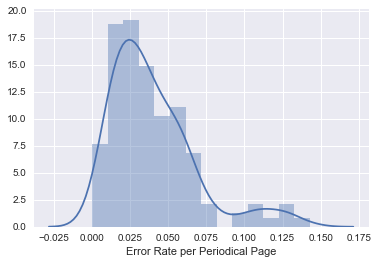

In [20]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 565),
 ('th', 161),
 ('ch', 132),
 ('d', 117),
 ('n', 77),
 ('ex', 75),
 ('ver', 74),
 ('e', 71),
 ('t', 68),
 ('x', 58),
 ("'the", 56),
 ('m', 54),
 ('w', 53),
 ('ment', 46),
 ("the'", 45),
 ('r', 37),
 ('tion', 34),
 ('ly', 33),
 ('f', 27),
 ('g', 27),
 ('re', 25),
 ("'of", 23),
 ("and'", 20),
 ('ments', 20),
 ("'and", 18),
 ("to'", 18),
 ('eze', 17),
 ('ry', 17),
 ('br', 17),
 ('vt', 15),
 ('nant', 13),
 ("'to", 13),
 ('ful', 13),
 ('tuary', 12),
 ('tions', 12),
 ('es', 12),
 ('cy', 11),
 ('un', 11),
 ("'was", 11)]

## Correction 4 -- Remove Extra Quotation Marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
        print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PTAR184907XX-V01-01-page3.txt: [("'these", 'these')]
PTAR184907XX-V01-01-page5.txt: [("'from", 'from')]
PTAR184907XX-V01-01-page7.txt: [("'violate", 'violate')]
PTAR184907XX-V01-01-page8.txt: [("'by", 'by')]
PTAR184907XX-V01-01-page9.txt: [("'of", 'of'), ("'keep", 'keep')]
PTAR184908XX-V01-02-page1.txt: [("'the", 'the')]
PTAR184908XX-V01-02-page8.txt: [("'act", 'act')]
PTAR184908XX-V01-03-page3.txt: [("'TILL", 'TILL')]
PTAR184908XX-V01-03-page7.txt: [("'gave", 'gave')]
PTAR184909XX-V01-04-page1.txt: [("'away", 'away')]
PTAR184909XX-V01-04-page4.txt: [("'that", 'that'), ("'present", 'present')]
PTAR184909XX-V01-04-page5.txt: [("'on", 'on')]
PTAR184912XX-V01-05-page2.txt: [("'and", 'and'), ("'recently", 'recently'), ("'Nov.", 'Nov.'), ("'impressed", 'impressed'), ("'Moser", 'Moser'), ("'of", 'of'), ("'the", 'the'), ("'into", 'into'), ("'him", 'him'), ("'the", 'the')]
PTAR184912XX-V01-05-page3.txt: [("'had", 'had'), ("'Me", 'Me'), ("'Rhodes", 'Rhodes'), ("'Itelpli", 'Itelpli'), ("'all.", 

## Check Correction 4

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PTAR/correction4

Average verified rate: 0.9628746245411058

Average of error rates: 0.03694782608695653

Total token count: 224725



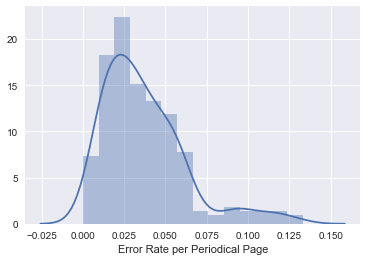

In [23]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 543),
 ('th', 161),
 ('ch', 132),
 ('d', 117),
 ('n', 79),
 ('ex', 76),
 ('ver', 75),
 ('e', 71),
 ('t', 69),
 ('x', 58),
 ('m', 54),
 ('w', 53),
 ('ment', 46),
 ("the'", 45),
 ('r', 37),
 ('tion', 35),
 ('ly', 33),
 ('f', 28),
 ('g', 27),
 ('re', 26),
 ('ments', 21),
 ("and'", 20),
 ("to'", 18),
 ('eze', 17),
 ('br', 17),
 ('ry', 17),
 ('vt', 15),
 ('nant', 13),
 ('ful', 13),
 ('tuary', 12),
 ('tions', 12),
 ('es', 12),
 ('cy', 11),
 ('un', 11)]

## Correction 5 -- Rejoin Split Words

In [25]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction5"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PTAR184907XX-V01-01-page5.txt: [('COV', 'ENANT')]
PTAR184908XX-V01-02-page8.txt: [('pre', 'cious')]
PTAR184908XX-V01-03-page2.txt: [('LOV', 'ED')]
PTAR184908XX-V01-03-page8.txt: [('th', 'at')]
PTAR184909XX-V01-04-page3.txt: [('DISPER', 'SIONS')]
PTAR184912XX-V01-05-page1.txt: [('IMMORTALI', 'TY'), ('IMMOR', 'TALITY'), ('th', 'em')]
PTAR184912XX-V01-05-page2.txt: [('JUSTIFI', 'CATION'), ('inte', 'rest')]
PTAR184912XX-V01-05-page6.txt: [('th', 'e')]
PTAR184912XX-V01-05-page8.txt: [('TR', 'UTH')]
PTAR184912XX-V01-06-page2.txt: [('TABER', 'NACLE')]
PTAR184912XX-V01-06-page7.txt: [('eigh', 't')]
PTAR185003XX-V01-07-page4.txt: [('TA', 'BLES')]
PTAR185003XX-V01-07-page5.txt: [('Tes', 'tament')]
PTAR185003XX-V01-07-page6.txt: [('fal', 'len')]
PTAR185003XX-V01-07-page7.txt: [('em', 'braced')]
PTAR185003XX-V01-08-page1.txt: [('noth', 'ing')]
PTAR185003XX-V01-08-page3.txt: [('re', 'main')]
PTAR185003XX-V01-08-page4.txt: [('sanctua', 'ry')]
PTAR185003XX-V01-08-page5.txt: [('HEAV', 'ENLY'), ('circu

## Check Correction 5

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PTAR/correction5

Average verified rate: 0.9632425599344794

Average of error rates: 0.03657391304347826

Total token count: 224662



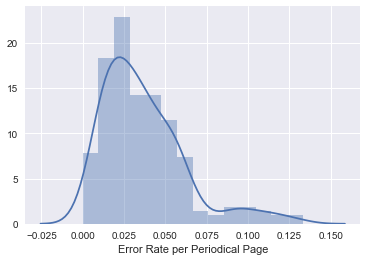

In [26]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 543),
 ('th', 155),
 ('ch', 132),
 ('d', 117),
 ('n', 78),
 ('ver', 75),
 ('ex', 73),
 ('e', 68),
 ('t', 67),
 ('x', 58),
 ('m', 54),
 ('w', 53),
 ("the'", 45),
 ('ment', 44),
 ('r', 37),
 ('tion', 34),
 ('ly', 33),
 ('f', 28),
 ('g', 27),
 ('ments', 21),
 ("and'", 20),
 ('re', 18),
 ("to'", 18),
 ('eze', 17),
 ('br', 17),
 ('ry', 17),
 ('vt', 15),
 ('nant', 13),
 ('ful', 13),
 ('tuary', 12),
 ('tions', 12),
 ('cy', 11),
 ('es', 11)]

## Correction 6 -- Rejoin Split Words II

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PTAR184907XX-V01-01-page3.txt: [('PER', 'PETUAL'), ('COM', 'MANDMENTS')]
PTAR184907XX-V01-01-page4.txt: [('cove', 'nant'), ('COVE', 'NANT')]
PTAR184907XX-V01-01-page5.txt: [('COMMAND', 'MENTS')]
PTAR184908XX-V01-02-page3.txt: [('MIN', 'ISTRATION')]
PTAR184908XX-V01-02-page7.txt: [('LAW', 'FUL')]
PTAR184908XX-V01-02-page8.txt: [('pre', 'cious')]
PTAR184908XX-V01-03-page4.txt: [('COM', 'MANDMENTS')]
PTAR184912XX-V01-05-page1.txt: [('th', 'em')]
PTAR184912XX-V01-05-page2.txt: [('constant', 'ly')]
PTAR184912XX-V01-05-page8.txt: [('TR', 'UTH')]
PTAR185003XX-V01-07-page2.txt: [('COM', 'MANDMENTS')]
PTAR185003XX-V01-07-page3.txt: [('sin', 'gular')]
PTAR185003XX-V01-07-page4.txt: [('TA', 'BLES'), ('cove', 'nant'), ('COMMAND', 'MENTS')]
PTAR185003XX-V01-07-page6.txt: [('COMMAND', 'MENTS')]
PTAR185003XX-V01-07-page7.txt: [('Minis', 'tration'), ('MINIS', 'TRATION')]
PTAR185003XX-V01-08-page3.txt: [('govern', 'ment')]
PTAR185003XX-V01-08-page4.txt: [('sanctua', 'ry'), ('apart', 'ment')]
PTAR185003

## Check Correction 6

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PTAR/correction6

Average verified rate: 0.9634385240062687

Average of error rates: 0.03627391304347827

Total token count: 224608



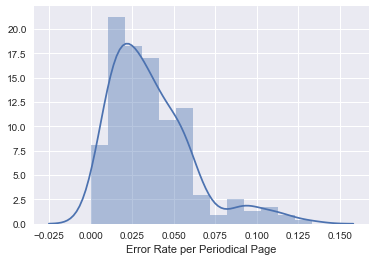

In [29]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 543),
 ('th', 154),
 ('ch', 132),
 ('d', 116),
 ('n', 78),
 ('ver', 75),
 ('ex', 73),
 ('e', 68),
 ('t', 67),
 ('x', 58),
 ('m', 53),
 ('w', 53),
 ("the'", 45),
 ('ment', 43),
 ('r', 37),
 ('tion', 34),
 ('ly', 31),
 ('f', 28),
 ('g', 27),
 ("and'", 20),
 ("to'", 18),
 ('eze', 17),
 ('ments', 17),
 ('br', 17),
 ('ry', 17),
 ('vt', 15),
 ('re', 13),
 ('nant', 12),
 ('ful', 12),
 ('tuary', 12),
 ('tions', 12),
 ('cy', 11)]

## Review Remaining Errors

In [31]:
reports.docs_with_high_error_rate(summary)

[]

In [32]:
reports.long_errors(errors_summary)

(['holichasten',
  'entreatfellow',
  'the-commandments',
  'whicircontained',
  'unrighteousimpressions',
  'commandinents',
  'couragement',
  'scriptuthou',
  "discovered'",
  'resurection',
  'hearejected',
  'incorparating',
  "instituted'",
  'fulfilltnent',
  'contrabecause',
  'constantorder',
  'blasphemeia',
  'wateradrenehed',
  'thelanguage',
  'experiencwithout',
  'acqaintance',
  "thebeliever's",
  'opinequally',
  'aldisturbance',
  'peoclaiming',
  'theirjudgment',
  'constantmeeting',
  'accomparadox',
  'wasitttreduced',
  'drunken-harlot',
  "earth'-wherein",
  'forguidance',
  'immeliately',
  "prophecies'",
  'sciiptiires',
  'hvbelieving',
  'ahaortlained',
  'occacross-bearing',
  'commencepectations',
  "warclownie'r",
  "adventists'",
  'expericially',
  'congregution',
  'indionation',
  'everlusting',
  'and-expected',
  'seventlimonth',
  'positivelydeciared',
  'howgdaiamthat',
  'wriversiort',
  'sabbath-day',
  'christiansin',
  'imporshould',
  'deliver

## Correction 7 -- Separate Squashed Words

In [33]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction7"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = utilities.readfile(directories['prev'], filename)
    clean.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = utilities.strip_punct(content)
    tokens = utilities.tokenize_text(text)
    
    wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
    maxword = max(len(x) for x in sorted_list_of_words)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 15:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = clean.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if clean.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

PTAR184909XX-V01-04-page6.txt: [('positiveinstitution', 'positive institution')]
PTAR184912XX-V01-05-page1.txt: [('transgressorSunder', 'transgressor S under')]
PTAR184912XX-V01-05-page2.txt: [('thoroughlyhealed', 'thoroughly healed')]
PTAR184912XX-V01-05-page3.txt: [('theinterpretation', 'the interpretation')]
PTAR184912XX-V01-05-page8.txt: [('greatandnotabledayefthe', 'great and not a b led a ye f t h e')]
PTAR185003XX-V01-07-page6.txt: [('Wordfortheniselves', 'Word for then i selves'), ('anotheresteemeth', 'another esteemeth')]
PTAR185003XX-V01-07-page7.txt: [('positivelydecIared', 'positively de c I a red'), ('twoministrations', 'two ministration s'), ('theininistration', 'the in in i st r a t i o n')]
PTAR185003XX-V01-08-page3.txt: [('personagesappear', 'person ages appear')]
PTAR185003XX-V01-08-page4.txt: [('cleantermination', 'clean termination')]
PTAR185003XX-V01-08-page6.txt: [('startingspointot', 'start ing s point o t')]
PTAR185003XX-V01-08-page7.txt: [('perfectioifilment', 

## Check Correction 7

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/PTAR/correction7

Average verified rate: 0.963552162714036

Average of error rates: 0.03613913043478261

Total token count: 224787



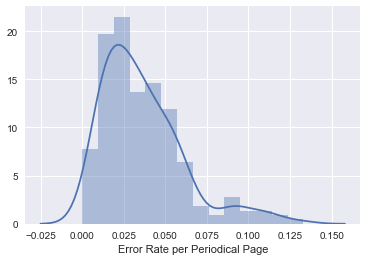

In [34]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [35]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[("'", 543),
 ('th', 154),
 ('ch', 132),
 ('d', 117),
 ('n', 83),
 ('t', 79),
 ('ver', 75),
 ('ex', 73),
 ('e', 72),
 ('x', 58),
 ('m', 55),
 ('w', 53),
 ("the'", 45),
 ('ment', 43),
 ('r', 39),
 ('tion', 34),
 ('ly', 31),
 ('f', 29),
 ('g', 28),
 ("and'", 20),
 ("to'", 18),
 ('eze', 17),
 ('ments', 17),
 ('br', 17),
 ('ry', 17),
 ('vt', 15),
 ('re', 13),
 ('nant', 12),
 ('ful', 12),
 ('tuary', 12),
 ('tions', 12),
 ('cy', 11)]